Date: 09.04.2023

Author: Reto Hendry

This notebook is to test the reversal of the resampled and flattened np array. It should also mark the most relevant feature. 

## import libs and define functions

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib
import tqdm

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from functions.function_plot_3d_array_colored import plot_3d_array_colored
from functions.function_get_feature_positions import get_feature_positions

In [93]:
def unpad_array(padded_array, padding):
    """
    Unpad a padded array.

    Parameters
    ----------
    padded_array : numpy.ndarray
        The padded array.
    padding : list
        A list of tuples containing the padding values for each dimension.

    Returns
    -------
    original_array : numpy.ndarray
        The original array before padding.
    
    """
    # Initialize an empty list to store the slices for each dimension
    slices = []
    
    # Loop through each dimension's padding values
    for pad in padding:
        start = pad[0]

        if pad[1] > 0:
            stop = -pad[1]
        else:
            stop = None  # slice till the end
        
        slices.append(slice(start, stop))
    
    original_array = padded_array[tuple(slices)]

    return original_array

## padding -> reverse

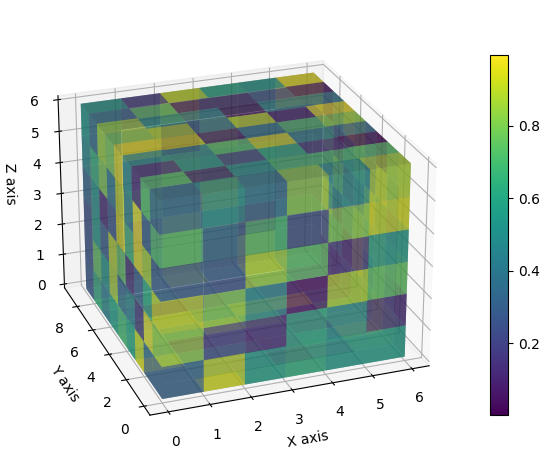

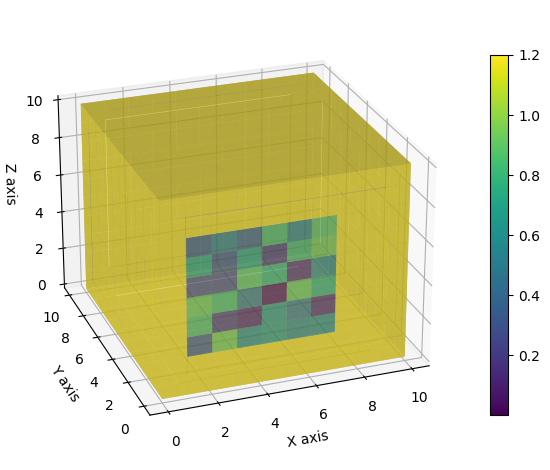

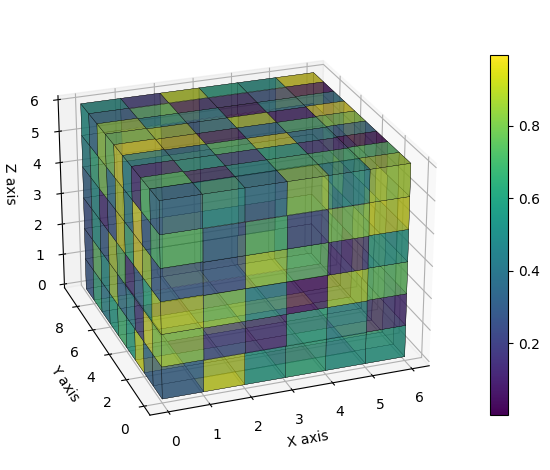

True


In [94]:
# create a padding list
padding = [(1, 3), (0, 1), (2, 2)]

# create a small 3d array of random numbers
small_3d_array = np.random.rand(6, 9, 6)
plot_3d_array_colored(small_3d_array)

# pad the array
padded_small_3d_array = np.pad(small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_small_3d_array)

# Reverse the padding operation
original_array = unpad_array(padded_small_3d_array, padding)
plot_3d_array_colored(original_array, linewidth_voxel=0.2)

# Check if the arrays are equal
print(np.array_equal(small_3d_array, original_array))

## resampling -> reverse

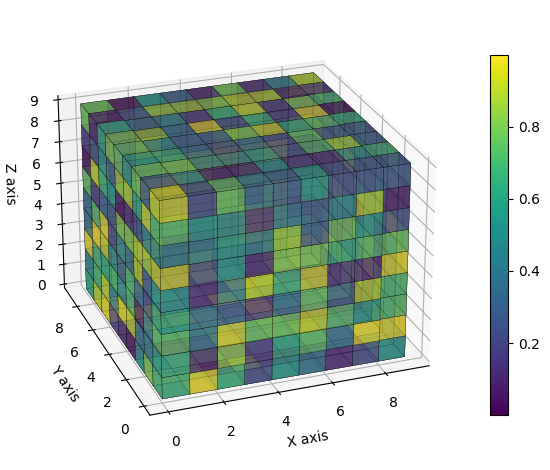

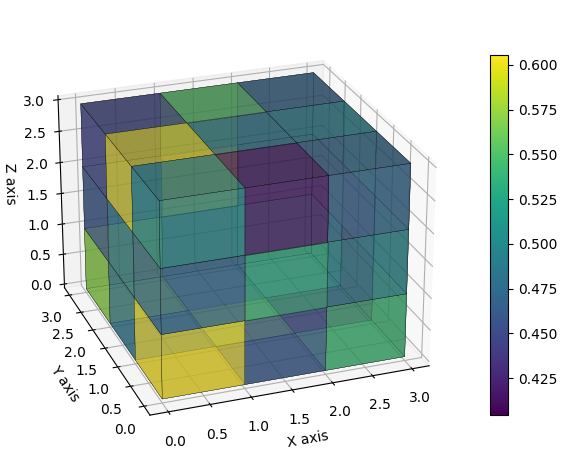

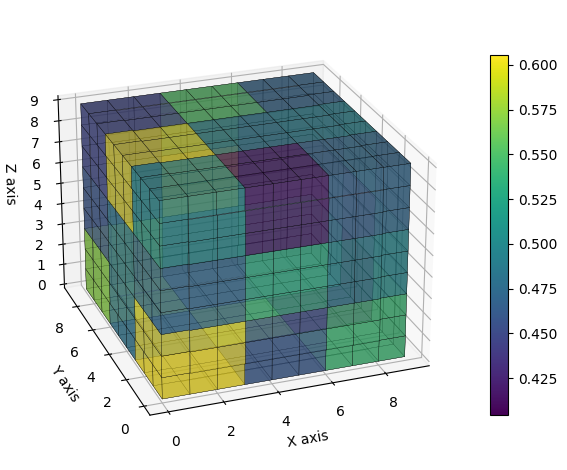

In [95]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (small_3d_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array, linewidth_voxel=0.2)


## resampling, reshaping -> reverse

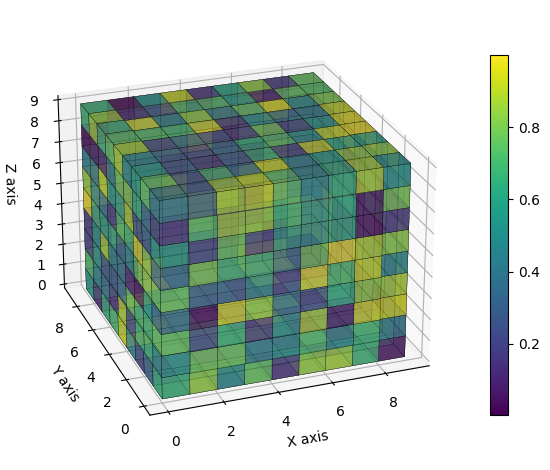

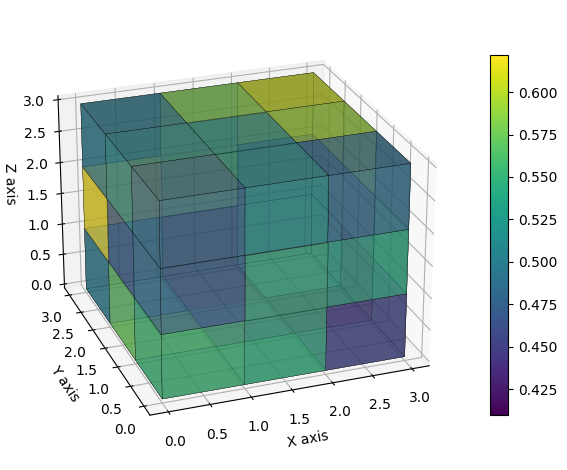

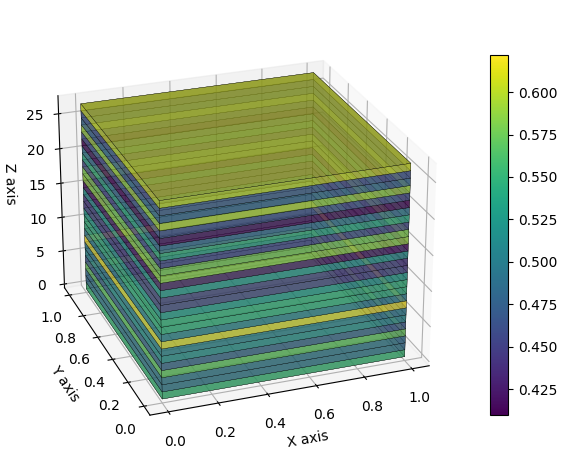

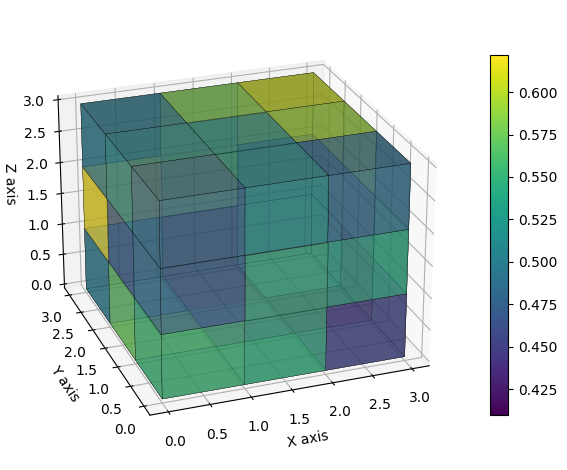

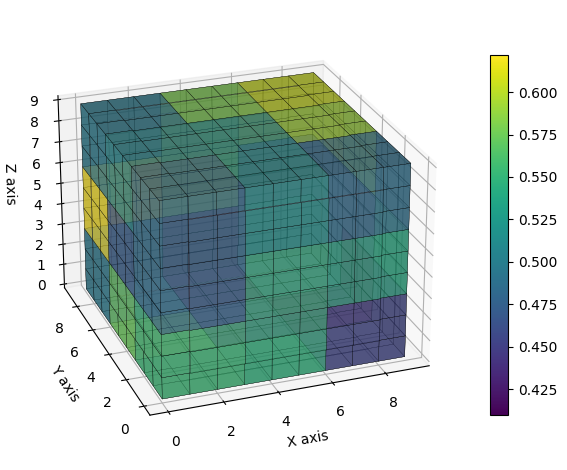

In [96]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))

# plot the array
plot_3d_array_colored(flattened_array, linewidth_voxel=0.2)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)

# plot the array
plot_3d_array_colored(unflattened_array, linewidth_voxel=0.2)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array, linewidth_voxel=0.2)

## padding, resampling, reshaping -> reverse

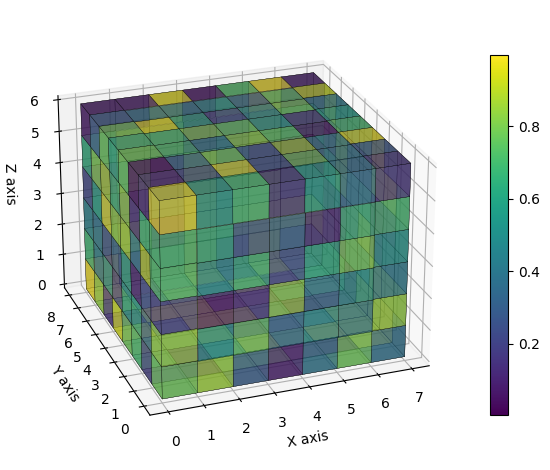

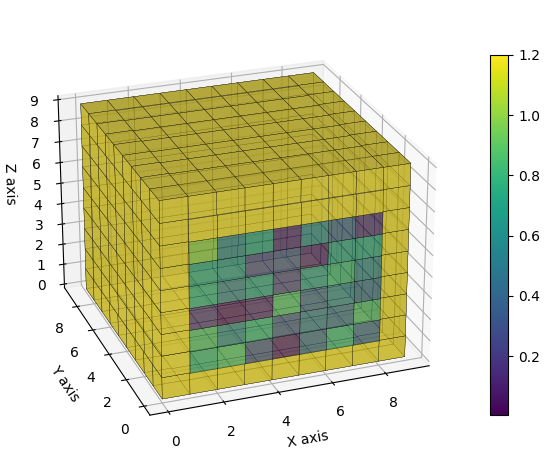

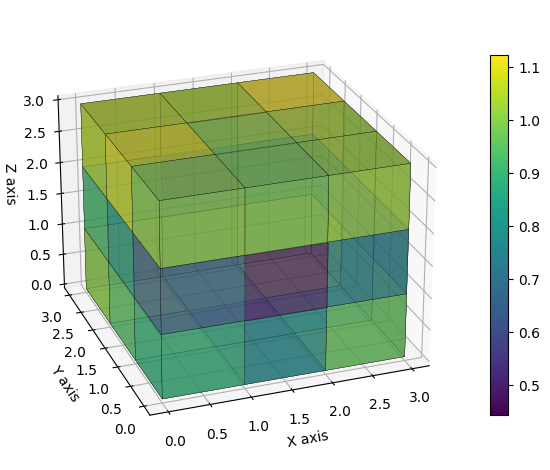

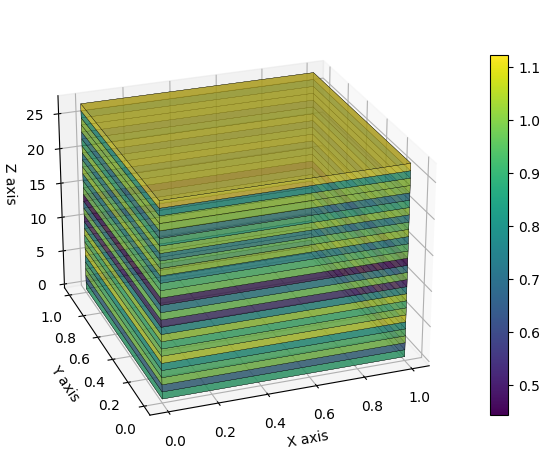

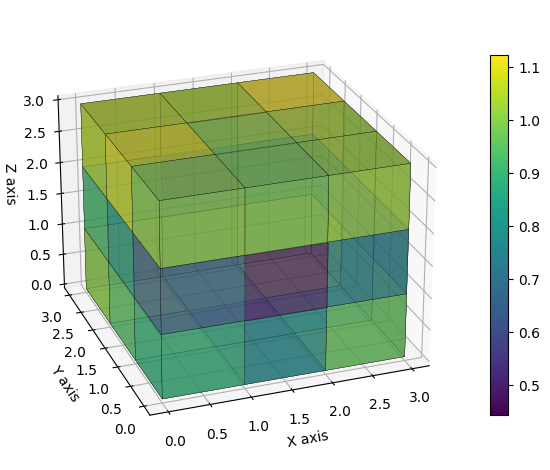

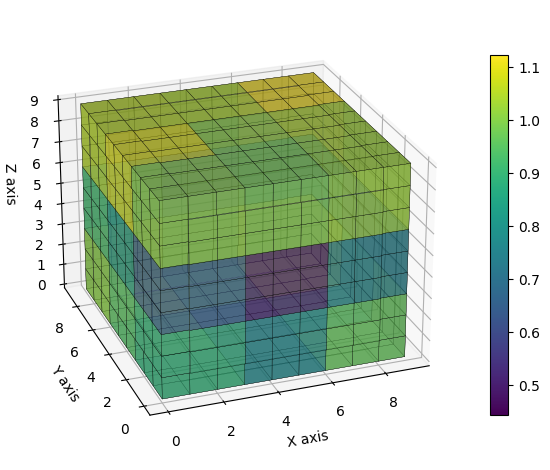

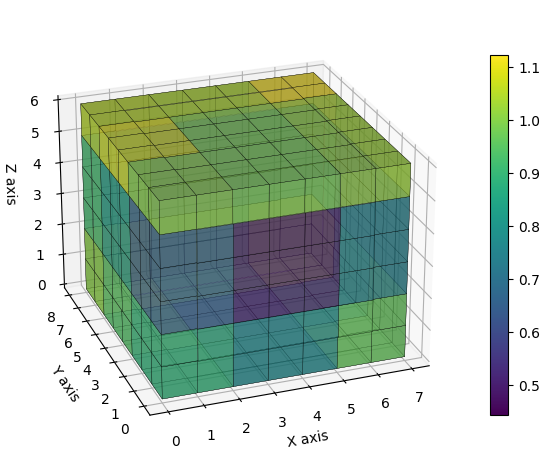

In [97]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array, linewidth_voxel=0.2)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array, linewidth_voxel=0.2)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array, linewidth_voxel=0.2)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, linewidth_voxel=0.2)

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
plot_3d_array_colored(original_array, linewidth_voxel=0.2)

## + visualize features

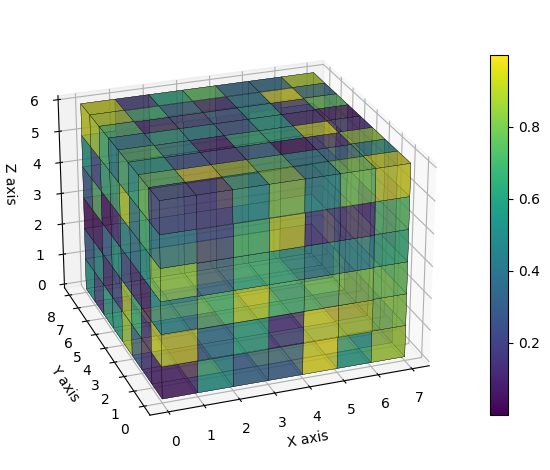

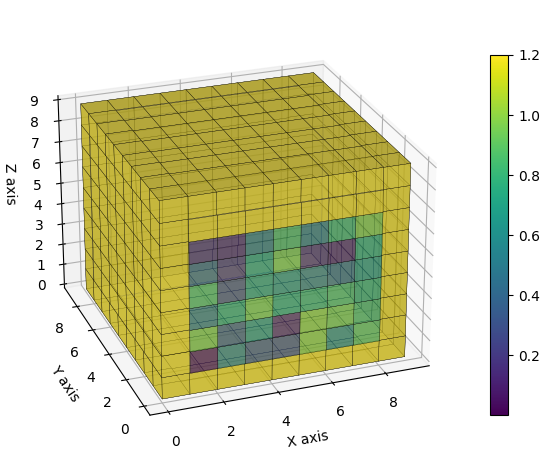

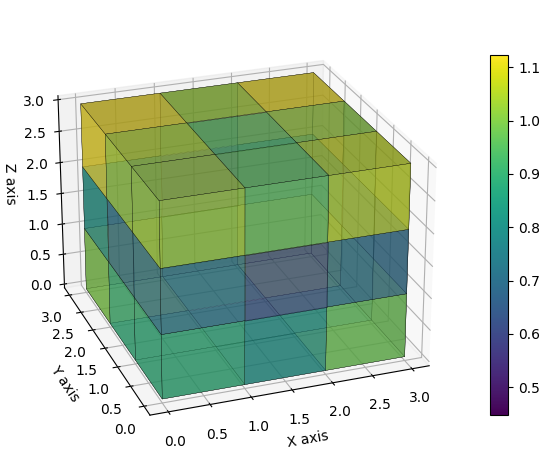

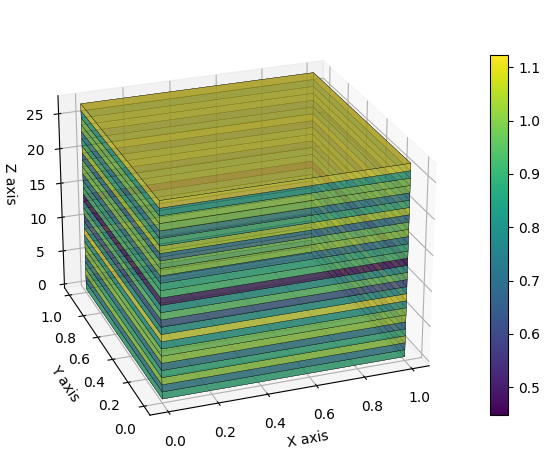

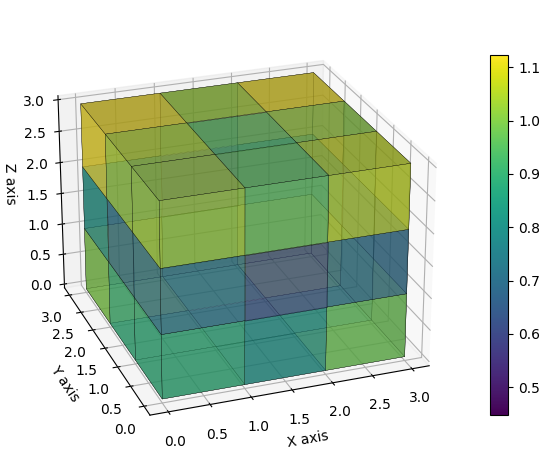

(3, 3, 3)
[(0, 0, 2), (0, 2, 2), (2, 1, 0)]
[[0 0 2]
 [0 2 2]
 [2 1 0]]


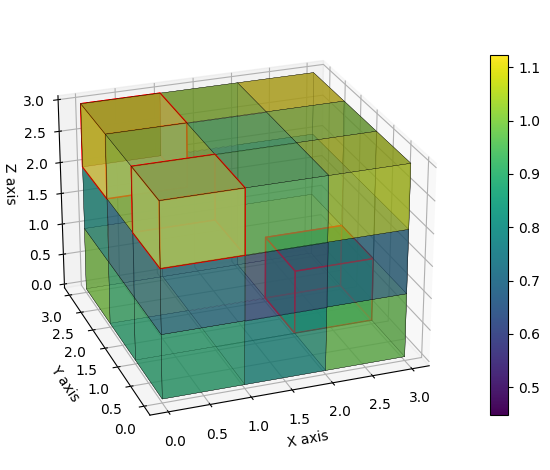

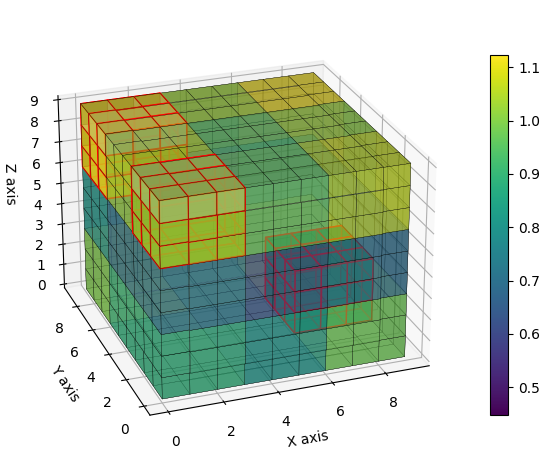

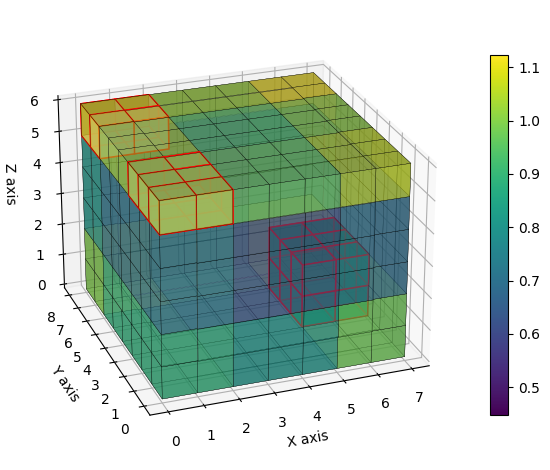

In [98]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array, linewidth_voxel=0.2)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array, linewidth_voxel=0.2)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array, linewidth_voxel=0.2)

######################
# Find the indices of the important elements in the unflattened array 
# based on the flattened array
marker_array = unflattened_array.copy()
important_indices_flattened = [2, 8, 21]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
print(unflattened_array.shape)
print(important_indices_3d)
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices, linewidth_voxel=0.2)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True), linewidth_voxel=0.2)

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True), linewidth_voxel=0.2)

## Test on 91 x 109 x 91 array

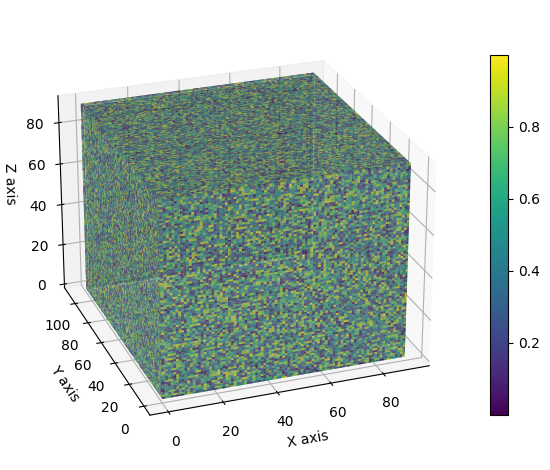

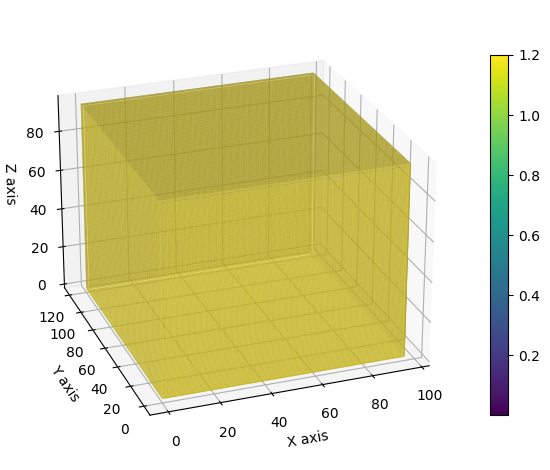

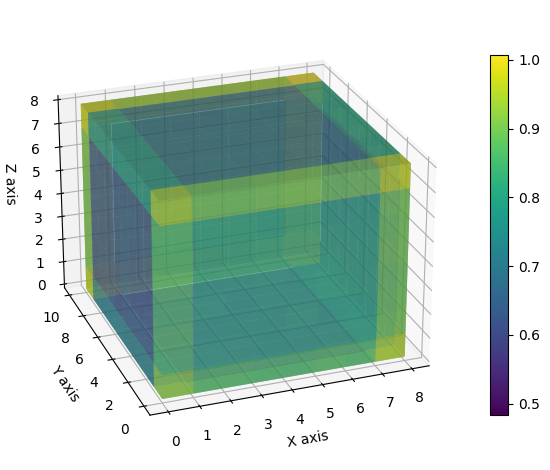

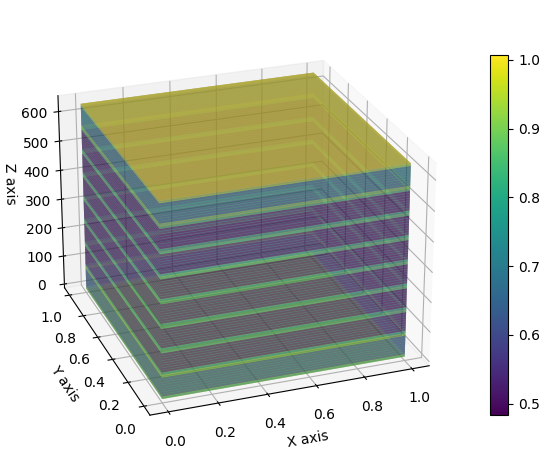

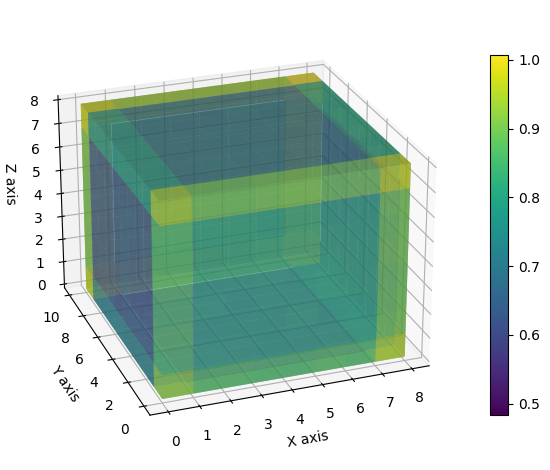

(8, 10, 8)
[(4, 5, 3), (2, 4, 4), (2, 5, 5), (4, 4, 5), (5, 4, 5), (3, 2, 3), (2, 6, 1), (3, 4, 5), (3, 4, 1), (1, 5, 4)]
[[1 5 4]
 [2 4 4]
 [2 5 5]
 [2 6 1]
 [3 2 3]
 [3 4 1]
 [3 4 5]
 [4 4 5]
 [4 5 3]
 [5 4 5]]


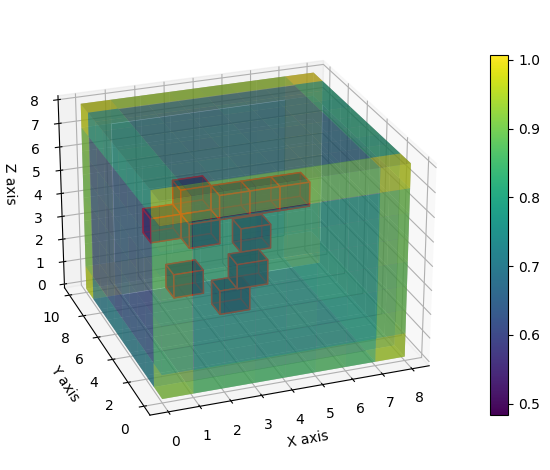

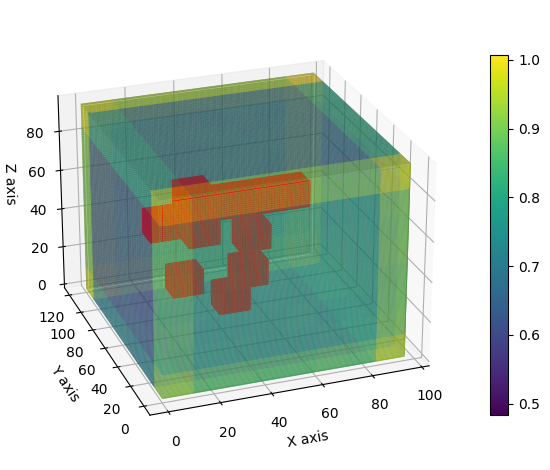

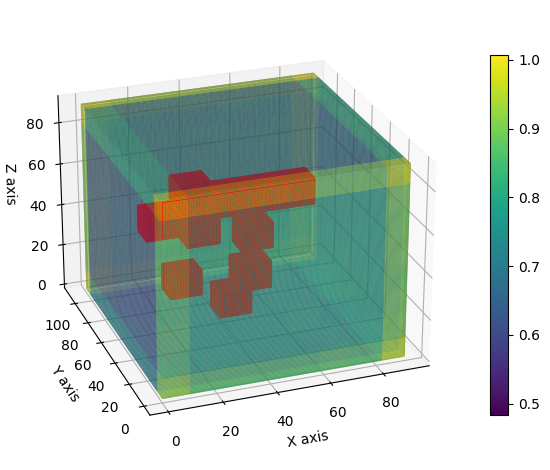

In [99]:
# example on shape of actual MVPA data

s = 12
resample_cube = (s, s, s)
padding = [(2, 3), (5, 6), (2, 3)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(91, 109, 91)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# Find the indices of the important elements in the unflattened array 
# based on the flattened array
marker_array = unflattened_array.copy()
important_indices_flattened = [363, 196, 205, 357, 437, 259, 209, 277, 273, 124]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
print(unflattened_array.shape)
print(important_indices_3d)
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True))

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True))

## Create markers and NIfTY files

done with get_feature_positions


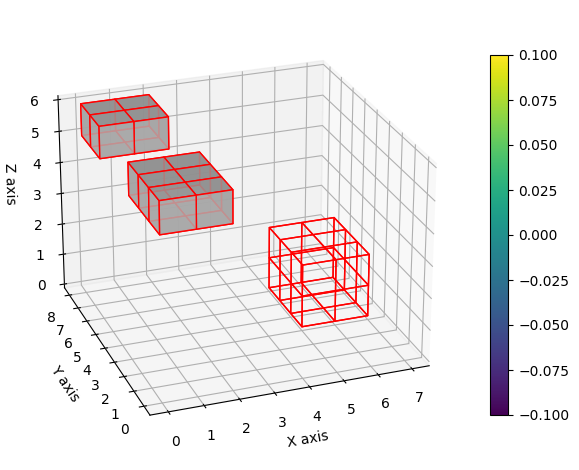

In [100]:
marker = get_feature_positions(
    [2, 8, 21], 
    [(1, 1), (0, 1), (1, 2)],
    3,
    (3, 3, 3)
)

array = np.zeros((7, 8, 6))
plot_3d_array_colored(array, marker)

In [101]:
marker = get_feature_positions(
    [363, 196, 205, 357, 437, 259, 209, 277, 273, 124], 
    [(2, 3), (5, 6), (2, 3)],
    12,
    (8, 10, 8)
)

array = np.zeros((91, 109, 91))
# plot_3d_array_colored(array, marker)

done with get_feature_positions


In [102]:
# Create a 3D array filled with zeros (black) of shape (91, 109, 91)
black_image = np.zeros((91, 109, 91), dtype=np.uint8)

proof_best_features = [4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4170, 4050, 4171, 475, 476, 477, 1334, 478, 1333, 479, 1332, 1695, 1331, 1694, 3872, 4048, 4169, 3873, 4049, 912, 3874, 913, 3875, 914, 3876, 915, 916, 4062, 4063, 4064, 4065, 4066, 3770, 3891, 4067, 3771, 3892, 4068, 3772, 3893, 4069, 19, 0, 1, 2, 3, 4, 3762, 3763, 3764, 3765, 3766, 3767, 20, 3768, 21, 3769, 22, 23, 3780, 3781, 3782, 3783, 494, 495, 496, 497, 498, 3773, 3894, 3774, 3775, 3776, 3777, 3778, 3779, 4084, 4085, 4086, 3790, 4087, 3791, 4088, 38, 3792, 39, 3793, 3794, 4080, 4081, 4082, 4083, 3784, 3785, 3786, 3787, 40, 3788, 41, 3789, 42, 4099, 1258, 1257, 1256, 1255, 1254, 3795, 3796, 3797, 836, 3798, 837, 3799, 838, 839, 57, 58, 59, 1275, 1274, 1273, 840, 60, 61, 1712, 1711, 1710, 1277, 1276, 855, 856, 857, 858, 859, 1714, 76, 1713, 77, 78, 79, 1296, 1295, 1294, 1293, 1292, 80, 1729, 3913, 1733, 1732, 1731, 1730, 874, 875, 876, 877, 878, 3911, 3912, 4100, 4101, 4102, 3803, 3804, 1749, 1748, 3800, 3801, 3802, 3814, 3815, 893, 3816, 894, 3817, 895, 3818, 896, 3819, 897, 1750, 4103, 4104, 4105, 418, 3930, 4106, 419, 3931, 4107, 3811, 3932, 3812, 3933, 3813, 4120, 4121, 4122, 4123, 4124, 420, 421, 3949, 422, 3820, 4117, 3821, 4118, 4119, 4010, 4011, 4012, 4134, 4135, 3836, 3837, 3838, 3839, 437, 4125, 438, 3950, 4126, 439, 3951, 4006, 4127, 3831, 3952, 4007, 3832, 4008, 3833, 4009, 3834, 3835, 4140, 4141, 4142, 4143, 4144, 4145, 3970, 4025, 4146, 440, 3968, 441, 3969, 4136, 4137, 4138, 4139, 4150, 4030, 4151, 4031, 4152, 4153, 4154, 4155, 4156, 4157, 3858, 1315, 1314, 1313, 1676, 1312, 1675, 456, 1311, 1674, 457, 1673, 458, 1672, 459, 3971, 4026, 4147, 3972, 4027, 4148, 3852, 4028, 4149, 3853, 4029, 3854, 3855, 3856, 3857, 4161, 4162, 4163, 4043, 4164, 4044, 4165, 3990, 4045, 4166, 3991, 4046, 4167, 3992, 4047, 4168, 1330, 1693, 1692, 1691, 460, 4160, 4158, 4159, 3987, 3988, 3989]

# create the marker array
marker1 = get_feature_positions(
    [54705, 57190, 57235, 57236, 57189, 54706, 59811, 59765, 54659, 54660, 59766, 44261, 44260, 57464, 59719, 41731, 67862, 44307, 57281, 44306, 41730, 45875, 50012, 51475, 49229, 59812, 91871, 54934, 50152, 46836, 49275, 57144, 43345, 51896, 59857, 71966, 52543, 19238, 59720, 46835, 62616, 44215, 51805, 46790, 40815, 59301, 54980, 41605, 49365, 54335, 52542, 51850, 39073, 49045, 51759, 39028, 41651, 51575, 72089, 64219, 41776, 56864, 57556, 65331, 46881, 49183, 54334, 41604, 32023, 51849, 74621, 46515, 72091, 57418, 91825, 52221, 48405, 47400, 54751, 57327, 67816, 49230, 62342, 44601, 39200, 42145, 52129, 42146, 41777, 44871, 56865, 46837, 34552, 57465, 57510, 51804, 82260, 61695, 72090, 54289, 56771, 39661, 74575, 19239, 64172, 69559, 61689, 67178, 46791, 34600, 43346, 48945, 44305, 62110, 95333, 61688, 82259, 31489, 71907, 37226, 39201, 57096, 59119, 61830, 39662, 59673, 49320, 59300, 60132, 62341, 77151, 72043, 50892, 31535, 61690, 45876, 64468, 55026, 49276, 44916, 42099, 66983, 21814, 50013, 59858, 41775, 56818, 61642, 71965, 71967], 
    [(0, 1), (0, 1), (0, 1)],
    2,
    (46, 55, 46)
)

# Set the indices in the marker array to white (maximum value for the data type)
for idx in marker:
    black_image[tuple(idx)] = 255

affine_matrix = np.array([
    [-2.,  0.,  0., 90.],
    [ 0.,  2.,  0., -126.],
    [ 0.,  0.,  2., -72.],
    [ 0.,  0.,  0., 1.]
])

# Create a NIfTI image object from the modified image array and affine matrix
modified_image = nib.Nifti1Image(black_image, affine_matrix)

# Save the NIfTI image to a file
nib.save(modified_image, "mask_test_RC2_F150.nii")

done with get_feature_positions


done with get_feature_positions
(91, 109, 91)


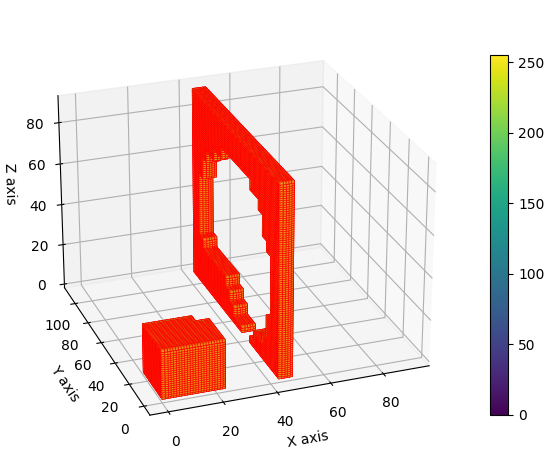

In [103]:
# Create a 3D array filled with zeros (black) of shape (91, 109, 91)
black_image = np.zeros((91, 109, 91), dtype=np.uint8)

proof_best_features = [4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4170, 4050, 4171, 475, 476, 477, 1334, 478, 1333, 479, 1332, 1695, 1331, 1694, 3872, 4048, 4169, 3873, 4049, 912, 3874, 913, 3875, 914, 3876, 915, 916, 4062, 4063, 4064, 4065, 4066, 3770, 3891, 4067, 3771, 3892, 4068, 3772, 3893, 4069, 19, 0, 1, 2, 3, 4, 3762, 3763, 3764, 3765, 3766, 3767, 20, 3768, 21, 3769, 22, 23, 3780, 3781, 3782, 3783, 494, 495, 496, 497, 498, 3773, 3894, 3774, 3775, 3776, 3777, 3778, 3779, 4084, 4085, 4086, 3790, 4087, 3791, 4088, 38, 3792, 39, 3793, 3794, 4080, 4081, 4082, 4083, 3784, 3785, 3786, 3787, 40, 3788, 41, 3789, 42, 4099, 1258, 1257, 1256, 1255, 1254, 3795, 3796, 3797, 836, 3798, 837, 3799, 838, 839, 57, 58, 59, 1275, 1274, 1273, 840, 60, 61, 1712, 1711, 1710, 1277, 1276, 855, 856, 857, 858, 859, 1714, 76, 1713, 77, 78, 79, 1296, 1295, 1294, 1293, 1292, 80, 1729, 3913, 1733, 1732, 1731, 1730, 874, 875, 876, 877, 878, 3911, 3912, 4100, 4101, 4102, 3803, 3804, 1749, 1748, 3800, 3801, 3802, 3814, 3815, 893, 3816, 894, 3817, 895, 3818, 896, 3819, 897, 1750, 4103, 4104, 4105, 418, 3930, 4106, 419, 3931, 4107, 3811, 3932, 3812, 3933, 3813, 4120, 4121, 4122, 4123, 4124, 420, 421, 3949, 422, 3820, 4117, 3821, 4118, 4119, 4010, 4011, 4012, 4134, 4135, 3836, 3837, 3838, 3839, 437, 4125, 438, 3950, 4126, 439, 3951, 4006, 4127, 3831, 3952, 4007, 3832, 4008, 3833, 4009, 3834, 3835, 4140, 4141, 4142, 4143, 4144, 4145, 3970, 4025, 4146, 440, 3968, 441, 3969, 4136, 4137, 4138, 4139, 4150, 4030, 4151, 4031, 4152, 4153, 4154, 4155, 4156, 4157, 3858, 1315, 1314, 1313, 1676, 1312, 1675, 456, 1311, 1674, 457, 1673, 458, 1672, 459, 3971, 4026, 4147, 3972, 4027, 4148, 3852, 4028, 4149, 3853, 4029, 3854, 3855, 3856, 3857, 4161, 4162, 4163, 4043, 4164, 4044, 4165, 3990, 4045, 4166, 3991, 4046, 4167, 3992, 4047, 4168, 1330, 1693, 1692, 1691, 460, 4160, 4158, 4159, 3987, 3988, 3989]

# create the marker array
marker2 = get_feature_positions(
    proof_best_features,
    [(2, 2), (0, 1), (2, 2)],
    5,
    (19, 22, 19)
)

# Set the indices in the marker array to white (maximum value for the data type)
for idx in marker2:
    black_image[tuple(idx)] = 255

# plot the marker array
print(black_image.shape)
plot_3d_array_colored(black_image, marker2)

done with get_feature_positions
(91, 109, 91)


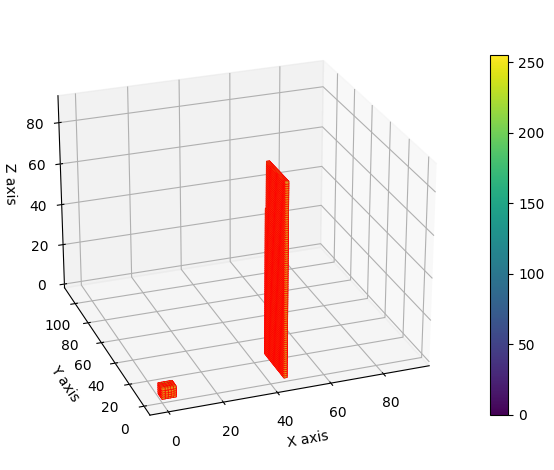

In [104]:
# Create a 3D array filled with zeros (black) of shape (91, 109, 91)
black_image = np.zeros((91, 109, 91), dtype=np.uint8)

proof_best_features = [0, 1, 2, 3, 4, 91, 92, 93, 94, 95, 182, 183, 184, 185, 186, 273, 274, 275, 276, 277, 364, 365, 366, 367, 368, 9919, 9920, 9921, 9922, 9923, 10010, 10011, 10012, 10013, 10014, 10101, 10102, 10103, 10104, 10105, 10192, 10193, 10194, 10195, 10196, 10283, 10284, 10285, 10286, 10287, 19838, 19839, 19840, 19841, 19842, 19929, 19930, 19931, 19932, 19933, 20020, 20021, 20022, 20023, 20024, 20111, 20112, 20113, 20114, 20115, 20202, 20203, 20204, 20205, 20206, 29757, 29758, 29759, 29760, 29761, 29848, 29849, 29850, 29851, 29852, 29939, 29940, 29941, 29942, 29943, 30030, 30031, 30032, 30033, 30034, 30121, 30122, 30123, 30124, 30125, 39676, 39677, 39678, 39679, 39680, 39767, 39768, 39769, 39770, 39771, 39858, 39859, 39860, 39861, 39862, 39949, 39950, 39951, 39952, 39953, 40040, 40041, 40042, 40043, 40044, 446355, 446356, 446357, 446358, 446359, 446360, 446361, 446362, 446363, 446364, 446365, 446366, 446367, 446368, 446369, 446370, 446371, 446372, 446373, 446374, 446375, 446376, 446377, 446378, 446379, 446380, 446381, 446382, 446383, 446384, 446385, 446386, 446387, 446388, 446389, 446390, 446391, 446392, 446393, 446394, 446395, 446396, 446397, 446398, 446399, 446400, 446401, 446402, 446403, 446404, 446405, 446406, 446407, 446408, 446409, 446410, 446411, 446412, 446413, 446414, 446415, 446416, 446417, 446418, 446419, 446420, 446421, 446422, 446423, 446424, 446425, 446426, 446427, 446428, 446429, 446430, 446431, 446432, 446433, 446434, 446435, 446436, 446437, 446438, 446439, 446440, 446441, 446442, 446443, 446444, 446445, 446446, 446447, 446448, 446449, 446450, 446451, 446452, 446453, 446454, 446455, 446456, 446457, 446458, 446459, 446460, 446461, 446462, 446463, 446464, 446465, 446466, 446467, 446468, 446469, 446470, 446471, 446472, 446473, 446474, 446475, 446476, 446477, 446478, 446479, 446480, 446481, 446482, 446483, 446484, 446485, 446486, 446487, 446488, 446489, 446490, 446491, 446492, 446493, 446494, 446495, 446496, 446497, 446498, 446499, 446500, 446501, 446502, 446503, 446504, 446505, 446506, 446507, 446508, 446509, 446510, 446511, 446512, 446513, 446514, 446515, 446516, 446517, 446518, 446519, 446520, 446521, 446522, 446523, 446524, 446525, 446526, 446527, 446528, 446529, 446530, 446531, 446532, 446533, 446534, 446535, 446536, 446537, 446538, 446539, 446540, 446541, 446542, 446543, 446544, 446545, 446546, 446547, 446548, 446549, 446550, 446551, 446552, 446553, 446554, 446555, 446556, 446557, 446558, 446559, 446560, 446561, 446562, 446563, 446564, 446565, 446566, 446567, 446568, 446569, 446570, 446571, 446572, 446573, 446574, 446575, 446576, 446577, 446578, 446579, 446580, 446581, 446582, 446583, 446584, 446585, 446586, 446587, 446588, 446589, 446590, 446591, 446592, 446593, 446594, 446595, 446596, 446597, 446598, 446599, 446600, 446601, 446602, 446603, 446604, 446605, 446606, 446607, 446608, 446609, 446610, 446611, 446612, 446613, 446614, 446615, 446616, 446617, 446618, 446619, 446620, 446621, 446622, 446623, 446624, 446625, 446626, 446627, 446628, 446629, 446630, 446631, 446632, 446633, 446634, 446635, 446636, 446637, 446638, 446639, 446640, 446641, 446642, 446643, 446644, 446645, 446646, 446647, 446648, 446649, 446650, 446651, 446652, 446653, 446654, 446655, 446656, 446657, 446658, 446659, 446660, 446661, 446662, 446663, 446664, 446665, 446666, 446667, 446668, 446669, 446670, 446671, 446672, 446673, 446674, 446675, 446676, 446677, 446678, 446679, 446680, 446681, 446682, 446683, 446684, 446685, 446686, 446687, 446688, 446689, 446690, 446691, 446692, 446693, 446694, 446695, 446696, 446697, 446698, 446699, 446700, 446701, 446702, 446703, 446704, 446705, 446706, 446707, 446708, 446709, 446710, 446711, 446712, 446713, 446714, 446715, 446716, 446717, 446718, 446719, 446720, 446721, 446722, 446723, 446724, 446725, 446726, 446727, 446728, 446729, 446730, 446731, 446732, 446733, 446734, 446735, 446736, 446737, 446738, 446739, 446740, 446741, 446742, 446743, 446744, 446745, 446746, 446747, 446748, 446749, 446750, 446751, 446752, 446753, 446754, 446755, 446756, 446757, 446758, 446759, 446760, 446761, 446762, 446763, 446764, 446765, 446766, 446767, 446768, 446769, 446770, 446771, 446772, 446773, 446774, 446775, 446776, 446777, 446778, 446779, 446780, 446781, 446782, 446783, 446784, 446785, 446786, 446787, 446788, 446789, 446790, 446791, 446792, 446793, 446794, 446795, 446796, 446797, 446798, 446799, 446800, 446801, 446802, 446803, 446804, 446805, 446806, 446807, 446808, 446809, 446810, 446811, 446812, 446813, 446814, 446815, 446816, 446817, 446818, 446819, 446820, 446821, 446822, 446823, 446824, 446825, 446826, 446827, 446828, 446829, 446830, 446831, 446832, 446833, 446834, 446835, 446836, 446837, 446838, 446839, 446840, 446841, 446842, 446843, 446844, 446845, 446846, 446847, 446848, 446849, 446850, 446851, 446852, 446853, 446854, 446855, 446856, 446857, 446858, 446859, 446860, 446861, 446862, 446863, 446864, 446865, 446866, 446867, 446868, 446869, 446870, 446871, 446872, 446873, 446874, 446875, 446876, 446877, 446878, 446879, 446880, 446881, 446882, 446883, 446884, 446885, 446886, 446887, 446888, 446889, 446890, 446891, 446892, 446893, 446894, 446895, 446896, 446897, 446898, 446899, 446900, 446901, 446902, 446903, 446904, 446905, 446906, 446907, 446908, 446909, 446910, 446911, 446912, 446913, 446914, 446915, 446916, 446917, 446918, 446919, 446920, 446921, 446922, 446923, 446924, 446925, 446926, 446927, 446928, 446929, 446930, 446931, 446932, 446933, 446934, 446935, 446936, 446937, 446938, 446939, 446940, 446941, 446942, 446943, 446944, 446945, 446946, 446947, 446948, 446949, 446950, 446951, 446952, 446953, 446954, 446955, 446956, 446957, 446958, 446959, 446960, 446961, 446962, 446963, 446964, 446965, 446966, 446967, 446968, 446969, 446970, 446971, 446972, 446973, 446974, 446975, 446976, 446977, 446978, 446979, 446980, 446981, 446982, 446983, 446984, 446985, 446986, 446987, 446988, 446989, 446990, 446991, 446992, 446993, 446994, 446995, 446996, 446997, 446998, 446999, 447000, 447001, 447002, 447003, 447004, 447005, 447006, 447007, 447008, 447009, 447010, 447011, 447012, 447013, 447014, 447015, 447016, 447017, 447018, 447019, 447020, 447021, 447022, 447023, 447024, 447025, 447026, 447027, 447028, 447029, 447030, 447031, 447032, 447033, 447034, 447035, 447036, 447037, 447038, 447039, 447040, 447041, 447042, 447043, 447044, 447045, 447046, 447047, 447048, 447049, 447050, 447051, 447052, 447053, 447054, 447055, 447056, 447057, 447058, 447059, 447060, 447061, 447062, 447063, 447064, 447065, 447066, 447067, 447068, 447069, 447070, 447071, 447072, 447073, 447074, 447075, 447076, 447077, 447078, 447079, 447080, 447081, 447082, 447083, 447084, 447085, 447086, 447087, 447088, 447089, 447090, 447091, 447092, 447093, 447094, 447095, 447096, 447097, 447098, 447099, 447100, 447101, 447102, 447103, 447104, 447105, 447106, 447107, 447108, 447109, 447110, 447111, 447112, 447113, 447114, 447115, 447116, 447117, 447118, 447119, 447120, 447121, 447122, 447123, 447124, 447125, 447126, 447127, 447128, 447129, 447130, 447131, 447132, 447133, 447134, 447135, 447136, 447137, 447138, 447139, 447140, 447141, 447142, 447143, 447144, 447145, 447146, 447147, 447148, 447149, 447150, 447151, 447152, 447153, 447154, 447155, 447156, 447157, 447158, 447159, 447160, 447161, 447162, 447163, 447164, 447165, 447166, 447167, 447168, 447169, 447170, 447171, 447172, 447173, 447174, 447175, 447176, 447177, 447178, 447179, 447180, 447181, 447182, 447183, 447184, 447185, 447186, 447187, 447188, 447189, 447190, 447191, 447192, 447193, 447194, 447195, 447196, 447197, 447198, 447199, 447200, 447201, 447202, 447203, 447204, 447205, 447206, 447207, 447208, 447209, 447210, 447211, 447212, 447213, 447214, 447215, 447216, 447217, 447218, 447219, 447220, 447221, 447222, 447223, 447224, 447225, 447226, 447227, 447228, 447229, 447230, 447231, 447232, 447233, 447234, 447235, 447236, 447237, 447238, 447239, 447240, 447241, 447242, 447243, 447244, 447245, 447246, 447247, 447248, 447249, 447250, 447251, 447252, 447253, 447254, 447255, 447256, 447257, 447258, 447259, 447260, 447261, 447262, 447263, 447264, 447265, 447266, 447267, 447268, 447269, 447270, 447271, 447272, 447273, 447274, 447275, 447276, 447277, 447278, 447279, 447280, 447281, 447282, 447283, 447284, 447285, 447286, 447287, 447288, 447289, 447290, 447291, 447292, 447293, 447294, 447295, 447296, 447297, 447298, 447299, 447300, 447301, 447302, 447303, 447304, 447305, 447306, 447307, 447308, 447309, 447310, 447311, 447312, 447313, 447314, 447315, 447316, 447317, 447318, 447319, 447320, 447321, 447322, 447323, 447324, 447325, 447326, 447327, 447328, 447329, 447330, 447331, 447332, 447333, 447334, 447335, 447336, 447337, 447338, 447339, 447340, 447341, 447342, 447343, 447344, 447345, 447346, 447347, 447348, 447349, 447350, 447351, 447352, 447353, 447354, 447355, 447356, 447357, 447358, 447359, 447360, 447361, 447362, 447363, 447364, 447365, 447366, 447367, 447368, 447369, 447370, 447371, 447372, 447373, 447374, 447375, 447376, 447377, 447378, 447379, 447380, 447381, 447382, 447383, 447384, 447385, 447386, 447387, 447388, 447389, 447390, 447391, 447392, 447393, 447394, 447395, 447396, 447397, 447398, 447399, 447400, 447401, 447402, 447403, 447404, 447405, 447406, 447407, 447408, 447409, 447410, 447411, 447412, 447413, 447414, 447415, 447416, 447417, 447418, 447419, 447420, 447421, 447422, 447423, 447424, 447425, 447426, 447427, 447428, 447429, 447430, 447431, 447432, 447433, 447434, 447435, 447436, 447437, 447438, 447439, 447440, 447441, 447442, 447443, 447444, 447445, 447446, 447447, 447448, 447449, 447450, 447451, 447452, 447453, 447454, 447455, 447456, 447457, 447458, 447459, 447460, 447461, 447462, 447463, 447464, 447465, 447466, 447467, 447468, 447469, 447470, 447471, 447472, 447473, 447474, 447475, 447476, 447477, 447478, 447479, 447480, 447481, 447482, 447483, 447484, 447485, 447486, 447487, 447488, 447489, 447490, 447491, 447492, 447493, 447494, 447495, 447496, 447497, 447498, 447499, 447500, 447501, 447502, 447503, 447504, 447505, 447506, 447507, 447508, 447509, 447510, 447511, 447512, 447513, 447514, 447515, 447516, 447517, 447518, 447519, 447520, 447521, 447522, 447523, 447524, 447525, 447526, 447527, 447528, 447529, 447530, 447531, 447532, 447533, 447534, 447535, 447536, 447537, 447538, 447539, 447540, 447541, 447542, 447543, 447544, 447545, 447546, 447547, 447548, 447549, 447550, 447551, 447552, 447553, 447554, 447555, 447556, 447557, 447558, 447559, 447560, 447561, 447562, 447563, 447564, 447565, 447566, 447567, 447568, 447569, 447570, 447571, 447572, 447573, 447574, 447575, 447576, 447577, 447578, 447579, 447580, 447581, 447582, 447583, 447584, 447585, 447586, 447587, 447588, 447589, 447590, 447591, 447592, 447593, 447594, 447595, 447596, 447597, 447598, 447599, 447600, 447601, 447602, 447603, 447604, 447605, 447606, 447607, 447608, 447609, 447610, 447611, 447612, 447613, 447614, 447615, 447616, 447617, 447618, 447619, 447620, 447621, 447622, 447623, 447624, 447625, 447626, 447627, 447628, 447629, 447630, 447631, 447632, 447633, 447634, 447635, 447636, 447637, 447638, 447639, 447640, 447641, 447642, 447643, 447644, 447645, 447646, 447647, 447648, 447649, 447650, 447651, 447652, 447653, 447654, 447655, 447656, 447657, 447658, 447659, 447660, 447661, 447662, 447663, 447664, 447665, 447666, 447667, 447668, 447669, 447670, 447671, 447672, 447673, 447674, 447675, 447676, 447677, 447678, 447679, 447680, 447681, 447682, 447683, 447684, 447685, 447686, 447687, 447688, 447689, 447690, 447691, 447692, 447693, 447694, 447695, 447696, 447697, 447698, 447699, 447700, 447701, 447702, 447703, 447704, 447705, 447706, 447707, 447708, 447709, 447710, 447711, 447712, 447713, 447714, 447715, 447716, 447717, 447718, 447719, 447720, 447721, 447722, 447723, 447724, 447725, 447726, 447727, 447728, 447729, 447730, 447731, 447732, 447733, 447734, 447735, 447736, 447737, 447738, 447739, 447740, 447741, 447742, 447743, 447744, 447745, 447746, 447747, 447748, 447749, 447750, 447751, 447752, 447753, 447754, 447755, 447756, 447757, 447758, 447759, 447760, 447761, 447762, 447763, 447764, 447765, 447766, 447767, 447768, 447769, 447770, 447771, 447772, 447773, 447774, 447775, 447776, 447777, 447778, 447779, 447780, 447781, 447782, 447783, 447784, 447785, 447786, 447787, 447788, 447789, 447790, 447791, 447792, 447793, 447794, 447795, 447796, 447797, 447798, 447799, 447800, 447801, 447802, 447803, 447804, 447805, 447806, 447807, 447808, 447809, 447810, 447811, 447812, 447813, 447814, 447815, 447816, 447817, 447818, 447819, 447820, 447821, 447822, 447823, 447824, 447825, 447826, 447827, 447828, 447829, 447830, 447831, 447832, 447833, 447834, 447835, 447836, 447837, 447838, 447839, 447840, 447841, 447842, 447843, 447844, 447845, 447846, 447847, 447848, 447849, 447850, 447851, 447852, 447853, 447854, 447855, 447856, 447857, 447858, 447859, 447860, 447861, 447862, 447863, 447864, 447865, 447866, 447867, 447868, 447869, 447870, 447871, 447872, 447873, 447874, 447875, 447876, 447877, 447878, 447879, 447880, 447881, 447882, 447883, 447884, 447885, 447886, 447887, 447888, 447889, 447890, 447891, 447892, 447893, 447894, 447895, 447896, 447897, 447898, 447899, 447900, 447901, 447902, 447903, 447904, 447905, 447906, 447907, 447908, 447909, 447910, 447911, 447912, 447913, 447914, 447915, 447916, 447917, 447918, 447919, 447920, 447921, 447922, 447923, 447924, 447925, 447926, 447927, 447928, 447929, 447930, 447931, 447932, 447933, 447934, 447935, 447936, 447937, 447938, 447939, 447940, 447941, 447942, 447943, 447944, 447945, 447946, 447947, 447948, 447949, 447950, 447951, 447952, 447953, 447954, 447955, 447956, 447957, 447958, 447959, 447960, 447961, 447962, 447963, 447964, 447965, 447966, 447967, 447968, 447969, 447970, 447971, 447972, 447973, 447974, 447975, 447976, 447977, 447978, 447979, 447980, 447981, 447982, 447983, 447984, 447985, 447986, 447987, 447988, 447989, 447990, 447991, 447992, 447993, 447994, 447995, 447996, 447997, 447998, 447999, 448000, 448001, 448002, 448003, 448004, 448005, 448006, 448007, 448008, 448009, 448010, 448011, 448012, 448013, 448014, 448015, 448016, 448017, 448018, 448019, 448020, 448021, 448022, 448023, 448024, 448025, 448026, 448027, 448028, 448029, 448030, 448031, 448032, 448033, 448034, 448035, 448036, 448037, 448038, 448039, 448040, 448041, 448042, 448043, 448044, 448045, 448046, 448047, 448048, 448049, 448050, 448051, 448052, 448053, 448054, 448055, 448056, 448057, 448058, 448059, 448060, 448061, 448062, 448063, 448064, 448065, 448066, 448067, 448068, 448069, 448070, 448071, 448072, 448073, 448074, 448075, 448076, 448077, 448078, 448079, 448080, 448081, 448082, 448083, 448084, 448085, 448086, 448087, 448088, 448089, 448090, 448091, 448092, 448093, 448094, 448095, 448096, 448097, 448098, 448099, 448100, 448101, 448102, 448103, 448104, 448105, 448106, 448107, 448108, 448109, 448110, 448111, 448112, 448113, 448114, 448115, 448116, 448117, 448118, 448119, 448120, 448121, 448122, 448123, 448124, 448125, 448126, 448127, 448128, 448129, 448130, 448131, 448132, 448133, 448134, 448135, 448136, 448137, 448138, 448139, 448140, 448141, 448142, 448143, 448144, 448145, 448146, 448147, 448148, 448149, 448150, 448151, 448152, 448153, 448154, 448155, 448156, 448157, 448158, 448159, 448160, 448161, 448162, 448163, 448164, 448165, 448166, 448167, 448168, 448169, 448170, 448171, 448172, 448173, 448174, 448175, 448176, 448177, 448178, 448179, 448180, 448181, 448182, 448183, 448184, 448185, 448186, 448187, 448188, 448189, 448190, 448191, 448192, 448193, 448194, 448195, 448196, 448197, 448198, 448199, 448200, 448201, 448202, 448203, 448204, 448205, 448206, 448207, 448208, 448209, 448210, 448211, 448212, 448213, 448214, 448215, 448216, 448217, 448218, 448219, 448220, 448221, 448222, 448223, 448224, 448225, 448226, 448227, 448228, 448229, 448230, 448231, 448232, 448233, 448234, 448235, 448236, 448237, 448238, 448239, 448240, 448241, 448242, 448243, 448244, 448245, 448246, 448247, 448248, 448249, 448250, 448251, 448252, 448253, 448254, 448255, 448256, 448257, 448258, 448259, 448260, 448261, 448262, 448263, 448264, 448265, 448266, 448267, 448268, 448269, 448270, 448271, 448272, 448273, 448274, 448275, 448276, 448277, 448278, 448279, 448280, 448281, 448282, 448283, 448284, 448285, 448286, 448287, 448288, 448289, 448290, 448291, 448292, 448293, 448294, 448295, 448296, 448297, 448298, 448299, 448300, 448301, 448302, 448303, 448304, 448305, 448306, 448307, 448308, 448309, 448310, 448311, 448312, 448313, 448314, 448315, 448316, 448317, 448318, 448319, 448320, 448321, 448322, 448323, 448324, 448325, 448326, 448327, 448328, 448329, 448330, 448331, 448332, 448333, 448334, 448335, 448336, 448337, 448338, 448339, 448340, 448341, 448342, 448343, 448344, 448345, 448346, 448347, 448348, 448349, 448350, 448351, 448352, 448353, 448354, 448355, 448356, 448357, 448358, 448359, 448360, 448361, 448362, 448363, 448364, 448365, 448366, 448367, 448368, 448369, 448370, 448371, 448372, 448373, 448374, 448375, 448376, 448377, 448378, 448379, 448380, 448381, 448382, 448383, 448384, 448385, 448386, 448387, 448388, 448389, 448390, 448391, 448392, 448393, 448394, 448395, 448396, 448397, 448398, 448399, 448400, 448401, 448402, 448403, 448404, 448405, 448406, 448407, 448408, 448409, 448410, 448411, 448412, 448413, 448414, 448415, 448416, 448417, 448418, 448419, 448420, 448421, 448422, 448423, 448424, 448425]

# create the marker array
marker2 = get_feature_positions(
    proof_best_features,
    [(0, 0), (0, 0), (0, 0)],
    1,
    (91, 109, 91)
)

# Set the indices in the marker array to white (maximum value for the data type)
for idx in marker2:
    black_image[tuple(idx)] = 255

# plot the marker array
print(black_image.shape)
plot_3d_array_colored(black_image, marker2)

In [105]:
len(proof_best_features)

2196

## Test for proof of correctness

   Cond
0     0
1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
There should be 126 1s in the array.
Number of 1s in the array: 126


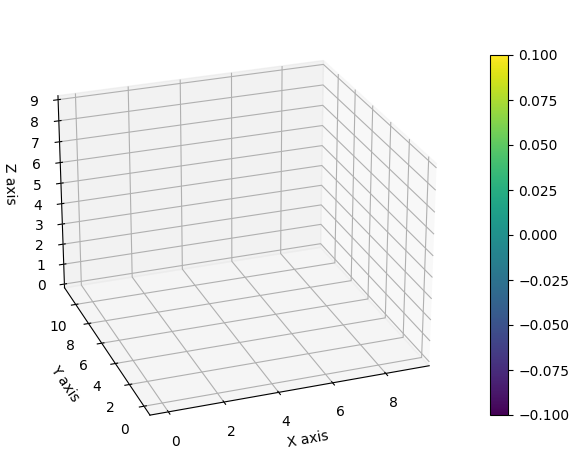

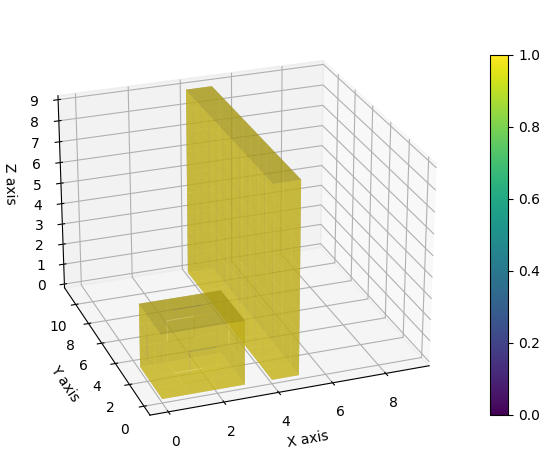

In [106]:
# create a 3d array with zeros with the shape (9, 11, 9)
# the format of the array is (sample, x, y, z)

# create a dataframe with the column "Cond" with values 0 and 1
# 0 means control, 1 means treatment
np.random.seed(0)
df_label = pd.DataFrame({"Cond": np.random.randint(0, 2, 10)})
print(df_label)

# change the values of the array to zeros
array = np.zeros((10, 9, 11, 9))

# For the samples which received the treatment (df_label["Cond"] = 1):
# change the middle plane of every sample to 1
array[df_label["Cond"]==1, int(array.shape[1]/2), :, :] = 1
# set a volume of (3, 3, 3) of the lower corner of every sample to 1
array[df_label["Cond"]==1, 0:3, 0:3, 0:3] = 1

# count how many 1s are in the array
print(f"There should be {array.shape[1] * array.shape[2] + 3*3*3} 1s in the array.")
print("Number of 1s in the array:", np.count_nonzero(array[1] == 1))

# plot the array
plot_3d_array_colored(array[0])
plot_3d_array_colored(array[1])